# Project: Investigate a Dataset - The Movie Database (TMDB Movies)

# Introduction 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
# Questions for Analysis
What are the longest and shortest movies?
Which director has the most number of movies?
What month has the higest revenue?
What is the most popular genre of each year?

In [82]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling

In [83]:
# load data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [85]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data Cleaning

# Changing Datatypes

In [86]:
# Changing release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [87]:
# Load dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


# Drop rows with missing values

In [88]:
# view missing value count for each feature
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [89]:
# drop rows with any null values in the dataset
df.dropna(inplace=True)

In [90]:
# checks if any of the columns have null values - should print False
df.isnull().sum().any()

False

Replacing 0 values in the data

In [91]:
# mean of budget_adj
print(df['budget_adj'].mean())

36273759.3226546


In [92]:
# Replace 0 values with mean.
df['budget_adj'] = df['budget_adj'].replace(0, 36273759.3226546)

In [93]:
# mean of revenue_adj
print(df['revenue_adj'].mean())

130239074.05593592


In [94]:
# Replace 0 values with mean
df['revenue_adj'] = df['revenue_adj'].replace(0, 130239074.05593592)

In [95]:
# mean of runtime
print(df['runtime'].mean())

106.04016064257029


In [96]:
# Replace 0 values with mean
df['runtime'] = df['runtime'].replace(0, 106.04016064257029)

In [97]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.146627,643.616968,6.178614,2007.796687,4.621627e+07,1.659371e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.040570,1092.355998,0.881955,7.549224,4.660184e+07,2.446051e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,5.000000,10.000000,2.100000,1961.000000,9.693980e-01,1.000000e+01
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,1.829521e+07,3.382971e+07
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,3.627376e+07,1.302391e+08
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


# Dedupe Data

In [98]:
# print number of duplicates in the datasets
print(df.duplicated().sum())

0


# Drop Extraneous Columns

In [99]:
# drop columns
df.drop(['budget', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies'], axis=1, inplace=True)

# confirm changes
df.head()

,id,imdb_id,popularity,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


# Answering Questions

# 1. What are the longest and shortest movie(s)?

In [100]:
# Longest movie(s)
df.original_title[df.runtime.max()]

'RoboCop'

In [101]:
# runtime
df.runtime[df.runtime == df.runtime.max()]

2722    705.0
Name: runtime, dtype: float64

In [102]:
# Shortest movie(s)
df.original_title[df.runtime.min()]

'The Revenant'

In [103]:
df.runtime[df.runtime == df.runtime.min()]

1661    5.0
2959    5.0
Name: runtime, dtype: float64

The longest movie in the dataset is Robocop with a runtime of 705 mins.
The shortest movie in the dataset is The Revenant with a runtime of 5 mins

# 2. Which director have the most number of movies?

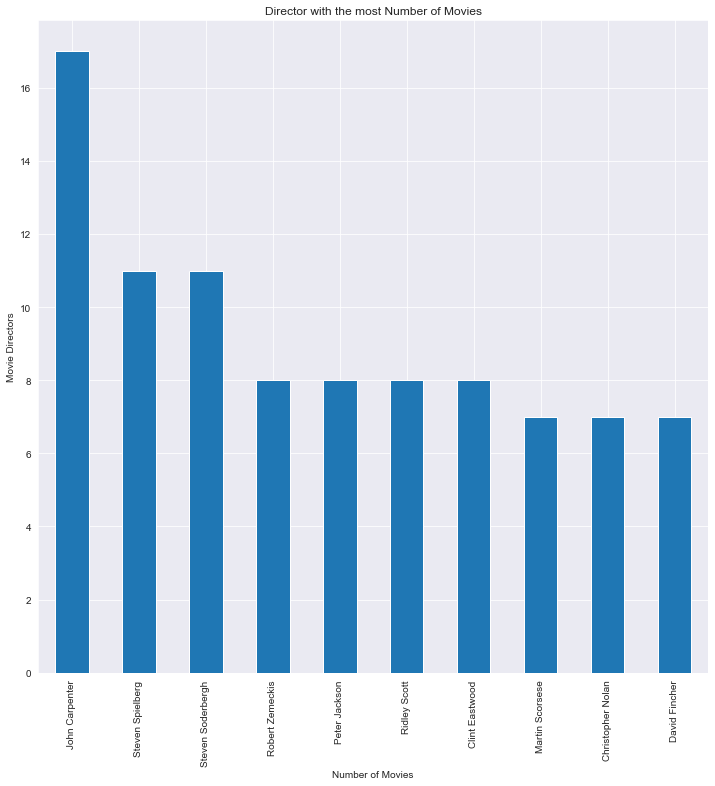

In [104]:
def plot_bar(values, title, xlabel, ylabel):
  # A function to draw a bar chart  
    plt.title(title)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    values.plot.bar(figsize=(12,12))
    
plot_bar(df['director'].value_counts().head(10), 'Director with the most Number of Movies', 'Movie Directors', 'Number of Movies')

John Carpenter has directed 17 movies which is the highest number of movies

# 3. What month has the highest revenue?

In [69]:
# Create a new column called "month".
df['month'] = df['release_date'].apply(lambda x: x.month)

In [70]:
df.head(1)

,id,imdb_id,popularity,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,tt0369610,32.985763,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6


In [71]:
# Group by month and sum the revenues.
month_revenue = df.groupby('month')['revenue_adj'].sum()
month_revenue

month
1     1.528942e+10
2     1.266497e+10
3     2.661402e+10
4     2.216137e+10
5     3.925880e+10
6     4.327959e+10
7     3.049050e+10
8     1.513141e+10
9     2.609340e+10
10    2.574117e+10
11    3.308222e+10
12    4.073991e+10
Name: revenue_adj, dtype: float64

Since the sixth month has the highest revenue then it is considered the best month for releasing a movie. So, let's plot this result in a bar chart

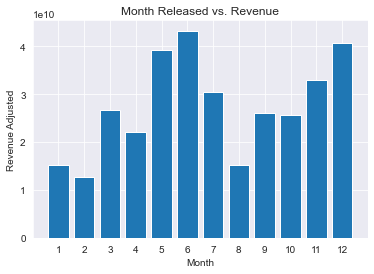

In [72]:
# Bar chart.
sns.set_style('darkgrid')
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], month_revenue, tick_label = [1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Month Released vs. Revenue')
plt.ylabel('Revenue Adjusted')
plt.xlabel('Month');


# 4. What is the most popular genre of each year?

In the genre column they are more than one genres. To clean the data further, we split the genres

In [73]:
# split the genres string
df.genres = df.genres.str.split('|')

In [74]:
# create genre list( create each row for each gen) using explode 
df = df.explode('genres')

In [75]:
# groupby year again and get the largest value
df.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)

release_year  release_year  genres         
1961          1961          Comedy              0.303783
1962          1962          Action              3.170651
1963          1963          Action              2.508235
1964          1964          Action              3.153791
1965          1965          Action              1.910465
1967          1967          Action              1.554808
1969          1969          Action              1.778746
1970          1970          Comedy              0.374514
1971          1971          Adventure           1.755117
1972          1972          Crime               5.738034
1973          1973          Drama               2.010733
1974          1974          Action              1.619555
1975          1975          Thriller            2.563191
1976          1976          Action              0.374631
1977          1977          Science Fiction    12.037933
1978          1978          Horror              1.198849
1979          1979          Action          

In [76]:
# tidy up the data further by removing extra row index by reset index
df = df.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)

In [77]:
# change the pandas series to pandas dataframe
df = df.reset_index()

In [78]:
# Load dataset
df.head()

,release_year,genres,popularity
0,1961,Comedy,0.303783
1,1962,Action,3.170651
2,1963,Action,2.508235
3,1964,Action,3.153791
4,1965,Action,1.910465


Now create a lineplot for the data

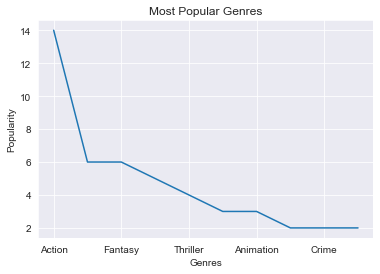

In [79]:
# set title
plt.title('Most Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Popularity')

# plot a lineplot
df['genres'].value_counts().head(10).plot.line()
plt.show()

Action Movies are the most popular genre for each year

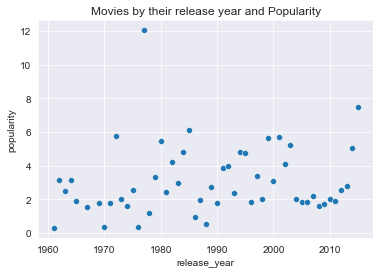

In [80]:
# draw a scatter plot
sns.scatterplot(x="release_year", y="popularity", data=df);

# set title
plt.title('Movies by their release year and Popularity');

# Conclusions

From my analysis, i found out what the longest and shortest movie duration is, the director with the most number of movies, the month with the highest revenue and the most popular genre of each year. With this finding, directors can invest more in genre of movies that produces high revenue and action movies, being the most popular of each year because the movie genres with higher revenues come with higher popularity
It is also best to release a movie in June, May or December, because it is in these months movies are more popular and tend to bring in the most revenue.